In [12]:
#classifying clothing items using ANN

In [13]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


###Dataset
For this tutorial we will use the MNIST Fashion Dataset. This is a dataset that is included in keras.

This dataset includes 60,000 images for training and 10,000 images for validation/testing.



In [14]:
#loading from keras built-in dataset

fashion_mnist = keras.datasets.fashion_mnist  # load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split into testing and training

In [15]:
#let's see the shape of data frame

train_images.shape

(60000, 28, 28)

In [16]:
#we can see one image

train_images[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

In [17]:
#The labels are integer values in range 0-9
train_labels[:10]  # let's have a look at the training labels

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [18]:
#let's create a list of names that can be seen during predictions for better understanding
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [19]:
test_images.shape

(10000, 28, 28)

##Data Preprocessing
The last step before creating our model is to *preprocess* our data. This simply means applying some prior transformations to our data before feeding it the model. In this case we will simply scale all our greyscale pixel values (0-255) to be between 0 and 1. We can do this by dividing each value in the training and testing sets by 255.0. We do this because smaller values will make it easier for the model to process our values. 




In [20]:
train_images = train_images / 255.0

test_images = test_images / 255.0

relu ={

              0, for x < 0
              x  for x >=0
        }

Activation function


(binary classification)
1) sigmoid : 0 and 1

(multiclass classification)
2) Softmax : probabilities for each node in the layer

3)  RELU  : gives answer if input is postive

In [ ]:
# hyperas

In [21]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

[link text](https://)**Layer 1:** This is our input layer and it will conist of 784 neurons. We use the flatten layer with an input shape of (28,28) to denote that our input should come in in that shape. The flatten means that our layer will reshape the shape (28,28) array into a vector of 784 neurons so that each pixel will be associated with one neuron.

**Layer 2:** This is our first and only hidden layer. The *dense* denotes that this layer will be fully connected and each neuron from the previous layer connects to each neuron of this layer. It has 128 neurons and uses the rectify linear unit activation function.

**Layer 3:** This is our output later and is also a dense layer. It has 10 neurons that we will look at to determine our models output. Each neuron represnts the probabillity of a given image being one of the 10 different classes. The activation function *softmax* is used on this layer to calculate a probabillity distribution for each class. This means the value of any neuron in this layer will be between 0 and 1, where 1 represents a high probabillity of the image being that class.

In [22]:
#let's compile the model. More details in the parameters used in compile in coming sessions

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### Add early stopping


In [42]:
from keras.callbacks import EarlyStopping,ModelCheckpoint

es = EarlyStopping(monitor='val_accuracy', mode='max', min_delta=0.005, patience=10)
mc = ModelCheckpoint('best_model.pkl', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)



In [43]:
#Now we can train the model
records = model.fit(train_images, 
          train_labels, 
          epochs=50, 
          validation_data=(test_images,test_labels),
          callbacks=[es,mc])  # we pass the data, labels and epochs and watch the magic!

Epoch 1/50
1867/1875 [============================>.] - ETA: 0s - loss: 0.2288 - accuracy: 0.9159

1875/1875 [==============================] - 6s 3ms/step - loss: 0.2289 - accuracy: 0.9159 - val_loss: 0.4806 - val_accuracy: 0.8610
Epoch 2/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2295 - accuracy: 0.9161 - val_loss: 0.4973 - val_accuracy: 0.8526
Epoch 3/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2301 - accuracy: 0.9159 - val_loss: 0.4807 - val_accuracy: 0.8590
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2298 - accuracy: 0.9154 - val_loss: 0.4857 - val_accuracy: 0.8569
Epoch 5/50
1872/1875 [============================>.] - ETA: 0s - loss: 0.2288 - accuracy: 0.9166

1875/1875 [==============================] - 6s 3ms/step - loss: 0.2288 - accuracy: 0.9166 - val_loss: 0.4819 - val_accuracy: 0.8611
Epoch 6/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2307 - accuracy: 0.9156 - val_loss: 0.4801 - val_accuracy: 0.8579
Epoch 7/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2283 - accuracy: 0.9162 - val_loss: 0.4887 - val_accuracy: 0.8562
Epoch 8/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2289 - accuracy: 0.9161 - val_loss: 0.4855 - val_accuracy: 0.8589
Epoch 9/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2278 - accuracy: 0.9162 - val_loss: 0.4924 - val_accuracy: 0.8594
Epoch 10/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2273 - accuracy: 0.9163 - val_loss: 0.4845 - val_accuracy: 0.8593
Epoch 11/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2281 - accuracy: 0.9168 - val_loss: 0.4853 - val_accuracy: 0.8572


In [41]:
import pandas as pd

results_df = pd.DataFrame( records.history   ,columns=list(records.history.keys()) )

results_df.sort_values(by="val_accuracy", ascending=False)

,loss,accuracy,val_loss,val_accuracy
7,0.230663,0.915067,0.470041,0.8618
1,0.233458,0.914317,0.458380,0.8606
6,0.231372,0.915183,0.484208,0.8603
4,0.232100,0.914633,0.467922,0.8599
9,0.229881,0.916033,0.473967,0.8595
0,0.233653,0.914450,0.473432,0.8583
5,0.230479,0.914767,0.468635,0.8580
8,0.232133,0.915033,0.486482,0.8580
3,0.232797,0.914217,0.465227,0.8578
10,0.230971,0.914733,0.490678,0.8578


In [24]:
#Now,we should evaluate the performance of our model


#use data previously not seen by the model for this step

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.4117 - accuracy: 0.8618
Test accuracy: 0.8618000149726868


You'll likely notice that the accuracy here is lower than when training the model. This difference is reffered to as **overfitting**.





In [25]:
#Let's make predictions now

predictions = model.predict(test_images) #using test images to verify on case by case basis


313/313 [==============================] - 1s 2ms/step


In [26]:
predictions[0]



array([7.4806508e-11, 1.6425098e-15, 1.2045339e-07, 1.9467148e-08,
       5.5345528e-10, 6.2770292e-04, 3.9811592e-11, 6.6223545e-03,
       3.6839531e-06, 9.9274617e-01], dtype=float32)

In [27]:
np.argmax(predictions[8898])

3

In [28]:
test_labels[8898]

3

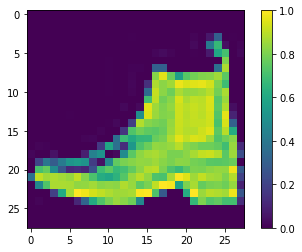

In [29]:
"""
Let's see if this is actually what is being predicted!
"""

plt.figure()
plt.imshow(test_images[876])
plt.colorbar()
plt.grid(False)
plt.show()